<a href="https://colab.research.google.com/github/Shlhnj/PACE/blob/main/vizualization_moana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make way for MOANA (Multi Ordination ANAlysis)... and Bob
**Author:** Ryan Vandermeulen (NOAA) and Eli Holmes (NOAA)</br>
Last updated: January 22, 2026

[![Colab Badge](https://img.shields.io/badge/Open_in_Colab-blue?style=for-the-badge)][colab-link] [![Download Badge](https://img.shields.io/badge/Download-grey?style=for-the-badge)][download-link] [![JupyterHub](https://img.shields.io/badge/Jupyter_Hub-orange?style=for-the-badge)][jupyter-link]
<!--
<a href="javascript:void(0);" onclick="openJupyterWidget('https://github.com/fish-pace/2025-tutorials/blob/main/vizualization_moana.ipynb');">
    <img src="https://img.shields.io/badge/Open_in_JupyterHub-orange?style=for-the-badge" alt="JupyterHub Badge">
</a>
-->

[download-link]: https://github.com/fish-pace/2025-tutorials/blob/main/vizualization_moana.ipynb
[colab-link]: https://colab.research.google.com/github/fish-pace/2025-tutorials/blob/main/vizualization_moana.ipynb
[jupyter-link]: https://nmfs-openscapes.2i2c.cloud/hub/user-redirect/lab?fromURL=https://raw.githubusercontent.com/fish-pace/2025-tutorials/main/vizualization_moana.ipynb

>📘 Learning Objectives
>
> 1. Create pretty maps of the three phytoplankton classes in MOANA
> 2. Plot how all three of these phytoplankton classes change in relation to latitude
> 3. Plot how all three of these phytoplankton classes change over the course of 1 year
> 4. Derive chlorophyll-based phytoplankton size (pico-, nano-, micro-) class estimates
> 5. Create a ternary plot showing where each phytoplankton size class dominates


#### You will need a full 2Gb for this tutorial

Go to Kernel > ShutDown All Kernels to free up all your memory if you are in a 2Gb instance.

## Interacting with multiple phytoplankton groups simultaneously

MOANA is the first phytoplankton community composition algorithm to be released by PACE. This product returns near-surface concentrations (cells mL-1) of three different picophytoplankton (i.e., phytoplankton <2 μm in size): Prochlorococcus, Synechococcus, and autotrophic picoeukaryotes. The algorithm uses empirical relationships between measured cell concentrations, in situ hyperspectral remote sensing reflectances, and sea surface temperatures. Details of this algorithm can be found in [Lange et al. (2020)](https://doi.org/10.1364/OE.398127).

Picophytoplankton are composed of the cyanobacteria Prochlorococcus (∼0.8 µm) and Synechococcus (∼1 µm), as well as picoeukaryotes, which combined are responsible for 50 to 90% of all primary production in open ocean ecosystems and contribute up to 30% of carbon export in these regions. Geographically, Prochlorococcus tends to inhabit warmer and mostly oligotrophic waters surrounded by Synechococcus patches along frontal boundaries. These fronts often reside at boundaries where phytoplankton communities start to transition to higher concentrations of larger eukaryotic cells, such as picoeukaryotes and nanoeukaryotic flagellates. Thus, identification of Prochlorococcus and Synechococcus distributions may be useful in identifying trophic boundaries in oceanic ecosystems, in addition to providing insight into productivity, food web regimes, and carbon export. **Note, for now, the MOANA product is only available for the Atlantic Ocean.**

## Moving from functional types to size classes

In this tutorial, we extend the concept of functional types to phytoplankton size classes, estimating the relative contributions of pico-, nano-, and micro-phytoplankton from satellite chlorophyll. Size classes are defined approximately by cell diameter:

- Pico: < 2 µm

- Nano: 2–20 µm

- Micro: > 20 µm

This is not a standard PACE product, but we're showing you how to create it here because different phytoplankton size classes have distinct ecological and trophic roles. For example, microphytoplankton can provide energy to higher trophic levels more efficiently (fewer trophic steps = less energy loss), while picophytoplankton tend to dominate in a closed microbial loop system supporting smaller zooplankton. [Woodworth-Jeffcoats and Wren (2020)](https://doi.org/10.1111/fog.12487) even found that phytoplankton size class has been shown as a useful predictor of Bigeye Tuna recruitment. Using global coefficients from [Brewin et al. (2011)](https://doi.org/10.1364/AO.50.004535), we can derive first-order estimates of phytoplankton size-class partioned chlorophyll-a, using the standard chlorophyll-a product from PACE. While this specific approach does not explicitly require hyperspectral data, working with these datasets can help get you primed for advanced phytoplankton community composition products that will soon be distributed by PACE.

## Load the data from NASA Earthdata

First, MOANA. We are getting the 8-day MOANA data at the 4km resolution.

In [3]:
# If you are on Colab uncomment this and run first to install packages
!pip install earthaccess cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2026.2.0 which is incompatible.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2026.2.0 which is incompatible.


In [2]:
import earthaccess
import xarray as xr
auth = earthaccess.login(persist=True)
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L4M_MOANA',
    temporal = ("2024-09-01", "2024-09-02"),
    granule_name="*.8D.*.4km.*"
)
len(results)

ModuleNotFoundError: No module named 'earthaccess'

In [ ]:
# Check the file name
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240828_20240904.L4m.8D.MOANA.V3_1.4km.nc']]

In [ ]:
# Load the data
fileset = earthaccess.open(results)
ds = xr.open_dataset(fileset[0])
ds

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 213MB
Dimensions:          (lat: 3360, lon: 2640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat              (lat) float32 13kB 69.98 69.94 69.9 ... -69.9 -69.94 -69.98
  * lon              (lon) float32 11kB -84.98 -84.94 -84.9 ... 24.9 24.94 24.98
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    prococcus_moana  (lat, lon) float64 71MB ...
    syncoccus_moana  (lat, lon) float64 71MB ...
    picoeuk_moana    (lat, lon) float64 71MB ...
    palette          (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20240828_20240904.L4m.8D.MOAN...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L4M/MOANA/3.1
    data_bins:                         3256679
    data_minimum:                      0.0
    data_maximum:                      2850208300.0

In [4]:
# Load Libraries for printing
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gc

# Create a coarsen function to speed up plotting
# subsample the lat/lons. We don't need to show all
def coarsen_da(da, step=2):
    return da.isel(lat=slice(None, None, step),
                   lon=slice(None, None, step))

## Map time!

We have three different phytoplankton classes in this MOANA data set. Let's create some pretty maps and get a sense of their relative distributions.

In [ ]:
# Define metadata for plots
phyto_info = {
    "Prochlorococcus": {
        "data": ds["prococcus_moana"],
        "cmap": plt.cm.Blues,
        "label": "Prochlorococcus conc. (cells mL⁻¹)"
    },
    "Synechococcus": {
        "data": ds["syncoccus_moana"],
        "cmap": plt.cm.Reds,
        "label": "Synechococcus conc. (cells mL⁻¹)"
    },
    "Picoeukaryotes": {
        "data": ds["picoeuk_moana"],
        "cmap": plt.cm.Greens,
        "label": "Picoeukaryote conc. (cells mL⁻¹)"
    }
}

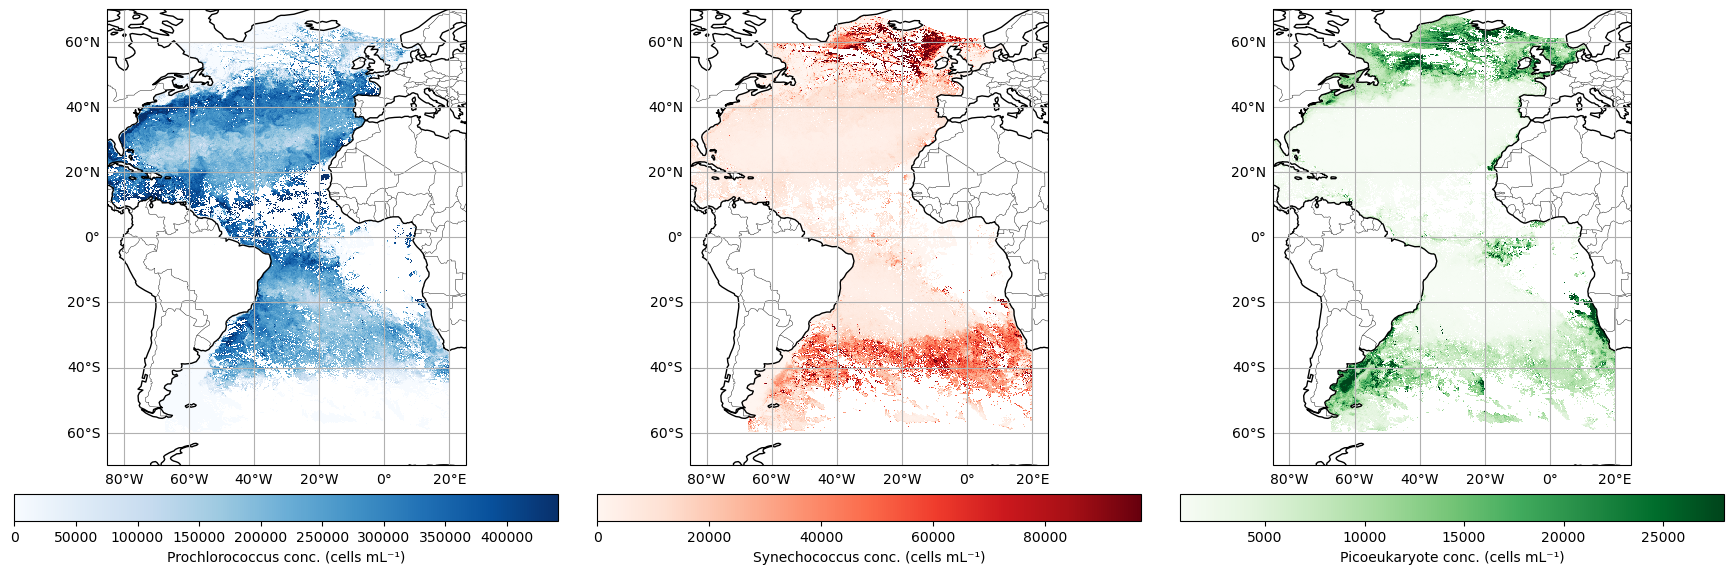

In [ ]:
# Set up figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Plot each phytoplankton group
for ax, (title, info) in zip(axs, phyto_info.items()):
    da = coarsen_da(info["data"], step=4)
    ax.set_title(title)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False

    img = da.plot(
        ax=ax,
        cmap=info["cmap"],
        robust=True,
        add_colorbar=False
    )

    cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.05, shrink=0.9)
    cbar.set_label(info["label"])

plt.tight_layout()
plt.show()

In [ ]:
# Do some clean up of memory
plt.close('all')
gc.collect()

0

Looking good! Here you can see that Prochlorococcus really runs amok in the offshore waters, while Synechococcus and Picoeukaryotes tend to dominate at higher latitudes, and Picoeukaryotes assert their dominance in along the coastal margins...to the degree that a free-floating cell can "assert" anything.

## Let's get a bit more quantitative

Let's get a little better sense of how these phytoplankton classes are geographically distributed. We will plot how all three of these phytoplankton classes change in relation to latitude. To do this, we will take "slices" of data and plot the median. Conceptually, think of a horizontal line across 50 degrees North - we'll extract all that data, take the median, and then move on to the pixel below (e.g. 49.98 degrees North) and do the same until we hit 50 degrees South. Doing this for each phytoplankton class, we can now distill this information into something that can be put onto a line plot.

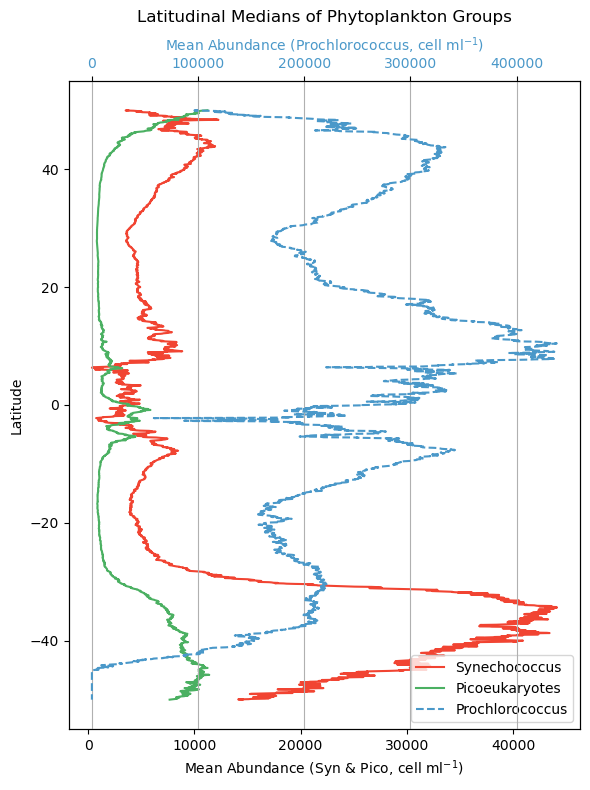

In [ ]:
# median since the latitudinal data have outliers
syn = ds["syncoccus_moana"].sel(lat = slice(50, -50)).median(dim=["lon"])
pro = ds["prococcus_moana"].sel(lat = slice(50, -50)).median(dim=["lon"])
pico = ds["picoeuk_moana"].sel(lat = slice(50, -50)).median(dim=["lon"])

custom_colors = {
    "Prochlorococcus": plt.cm.Blues(0.6),
    "Synechococcus": plt.cm.Reds(0.6),
    "Picoeukaryotes": plt.cm.Greens(0.6)
}

fig, ax1 = plt.subplots(figsize=(6, 8))  # Taller figure for vertical layout

# Primary axis: Syn and Pico
ax1.plot(syn, syn["lat"], label="Synechococcus", color=custom_colors["Synechococcus"])
ax1.plot(pico, pico["lat"], label="Picoeukaryotes", color=custom_colors["Picoeukaryotes"])
ax1.set_ylabel("Latitude")
ax1.set_xlabel("Mean Abundance (Syn & Pico, cell ml$^{-1}$)", color="black")
ax1.tick_params(axis='x', labelcolor="black")

# Secondary axis: Prochlorococcus
ax2 = ax1.twiny()
ax2.plot(pro, pro["lat"], label="Prochlorococcus", color=custom_colors["Prochlorococcus"], linestyle="--")
ax2.set_xlabel("Mean Abundance (Prochlorococcus, cell ml$^{-1}$)", color=custom_colors["Prochlorococcus"])
ax2.tick_params(axis='x', labelcolor=custom_colors["Prochlorococcus"])

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower right")

plt.title("Latitudinal Medians of Phytoplankton Groups", pad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Note that Prochlorococcus is on a separate axis here because the cells are so abundant. That doesn't necessarily mean they represent a larger amount of biomass across the board though. *Prochlorococcus* are teeny tiny little cyanobacteria cells, and *Synechococcus* and picoeukaryotes are larger, so in the latter case, fewer cells can represent more overall biomass. We make this distinction here becuase when we later consider which phytoplankton class is "dominant" in an area, it is relative to their respective range of concentrations, not absolute cell counts.

## The times, they are a changin'

For this exercise, we'll download one year's worth of PACE data to see how things are evolving over time. Using this time series, we will use the "slice" function again, but this time we'll extract a 3 degree x 3 degree box in the southern Atlantic Ocean. It can be smaller, or located elsewhere if you like, but either way, we're going to average the data within that box for each individual time step.

Next, we'll plot how all three of these phytoplankton classes change over the course of 1 year, allowing you to see the cycles of growth and decay relative to one another. It is useful to add this context because not all chlorophyll-a is equivalent, e.g., a bloom of *Prochlorococcus* may represent a different amount of trophic energy potential relative to blooms of other phytoplankton classes, or it may have come about from a different oceanographic process.

**Loading lots of files with `open_mfdataset()`**

We are doing this in this example as a convenience, but be aware that this uses more memory than needed. We could loop over files and compute the median values and that would only load one file worth of data into memory at a time. If we wanted to work with a decade of data, we would need a strategy like that in order to manage memory usage.

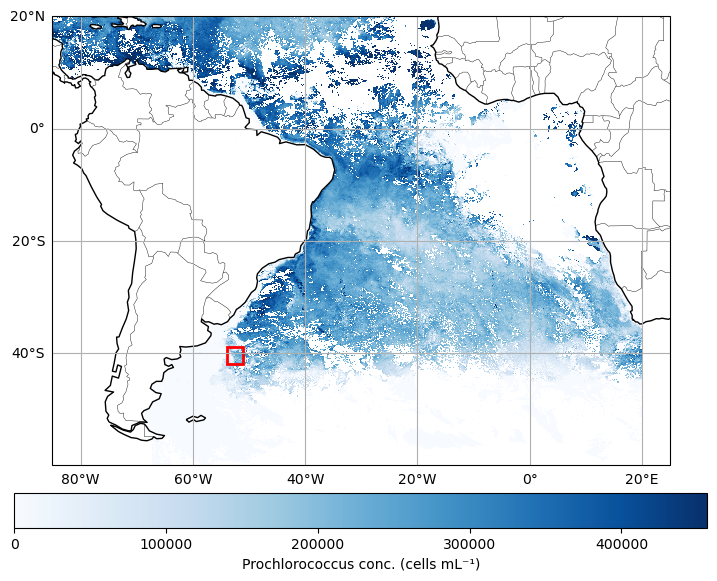

In [ ]:
from matplotlib.patches import Rectangle

# Bounding box
lon_min, lon_max = -54, -51
lat_min, lat_max = -42, -39

# Choose one phytoplankton group
title = "Prochlorococcus"
data = ds["prococcus_moana"].sel(lat=slice(20, -60))
data = coarsen_da(data, step=4)
cmap = plt.cm.Blues
label = "Prochlorococcus conc. (cells mL⁻¹)"

# Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Base map
ax.set_title(title)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = gl.right_labels = False
img = data.plot(ax=ax, cmap=cmap, robust=True, add_colorbar=False, vmin=0)

# Add bounding box
ax.add_patch(Rectangle((lon_min, lat_min),
                       lon_max - lon_min,
                       lat_max - lat_min,
                       edgecolor='red',
                       facecolor='none',
                       linewidth=2,
                       transform=ccrs.PlateCarree()))

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation='horizontal', pad=0.05, shrink=0.9)
cbar.set_label(label)
plt.tight_layout()
plt.show()


Load data and select our box.

In [ ]:
import earthaccess
import xarray as xr
auth = earthaccess.login(persist=True)
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L4M_MOANA',
    temporal = ("2024-03-01", "2025-03-02"),
    granule_name="*.8D.*.4km.*"
)
len(results)

46

In [ ]:
# the netcdfs do not have time so we need to get that from the results metadata
# Use the beginning of each 8-day window as the time coordinate
import numpy as np
time = [
    np.datetime64(r["umm"]["TemporalExtent"]["RangeDateTime"]["BeginningDateTime"][:10])
    for r in results
]

In [ ]:
# Creating a big dataset like this takes a bit of memory
fileset = earthaccess.open(results)
dataset = xr.open_mfdataset(fileset, concat_dim="time", combine="nested")
dataset = dataset.assign_coords(time=("time", time))
dataset

QUEUEING TASKS | :   0%|          | 0/46 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/46 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/46 [00:00<?, ?it/s]

<xarray.Dataset> Size: 10GB
Dimensions:          (time: 46, lat: 3360, lon: 2640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat              (lat) float32 13kB 69.98 69.94 69.9 ... -69.9 -69.94 -69.98
  * lon              (lon) float32 11kB -84.98 -84.94 -84.9 ... 24.9 24.94 24.98
  * time             (time) datetime64[s] 368B 2024-03-05 ... 2025-02-26
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    prococcus_moana  (time, lat, lon) float64 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    syncoccus_moana  (time, lat, lon) float64 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    picoeuk_moana    (time, lat, lon) float64 3GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette          (time, rgb, eightbitcolor) uint8 35kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240305_20240312.L4m.8D.MOAN...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L4M/MOANA/3.1
    data_bins:                         3191916
    data_minimum:                      0.0
    data_maximum:                      2116797900000.0

In [ ]:
# Subset to our region of interest
da=dataset.sel(lat=slice(-39,-42), lon=slice(-54,-51))

# Get the mean over the box
syn_ts = da["syncoccus_moana"].median(dim=["lat", "lon"])
pico_ts = da["picoeuk_moana"].median(dim=["lat", "lon"])
pro_ts = da["prococcus_moana"].median(dim=["lat", "lon"])

pro_ts

<xarray.DataArray 'prococcus_moana' (time: 46)> Size: 368B
dask.array<nanmedian, shape=(46,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[s] 368B 2024-03-05 2024-03-13 ... 2025-02-26

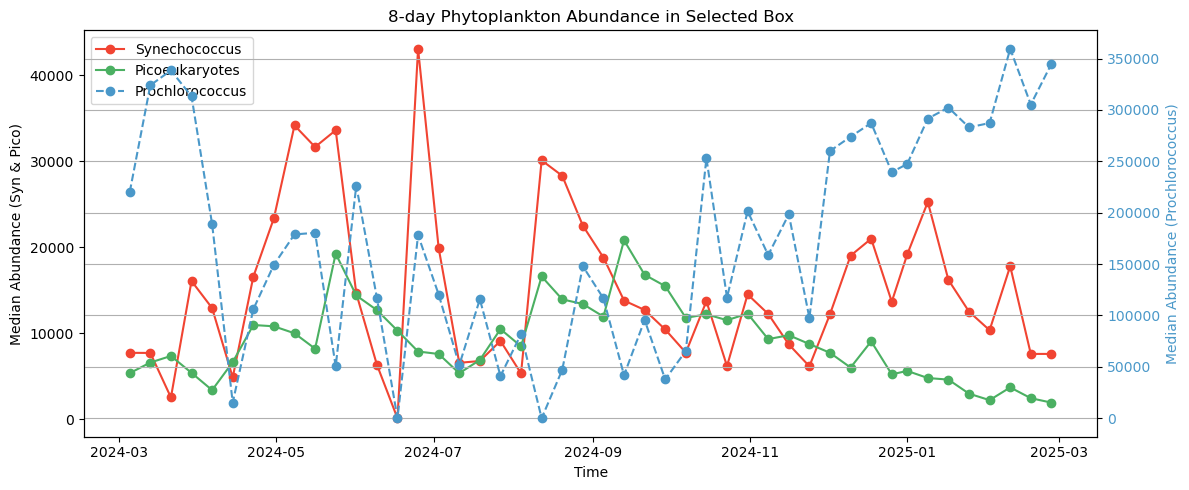

In [ ]:
# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 5))

custom_colors = {
    "Prochlorococcus": plt.cm.Blues(0.6),
    "Synechococcus": plt.cm.Reds(0.6),
    "Picoeukaryotes": plt.cm.Greens(0.6)
}

# Plot syn and pico on the left y-axis
ax1.plot(syn_ts["time"], syn_ts, 'o-', label="Synechococcus", color=custom_colors["Synechococcus"])
ax1.plot(pico_ts["time"], pico_ts, 'o-', label="Picoeukaryotes", color=custom_colors["Picoeukaryotes"])
ax1.set_xlabel("Time")
ax1.set_ylabel("Median Abundance (Syn & Pico)", color="black")
ax1.tick_params(axis='y', labelcolor="black")

# Create a secondary y-axis for prococcus_moana
ax2 = ax1.twinx()
ax2.plot(pro_ts["time"], pro_ts, 'o--', label="Prochlorococcus", color=custom_colors["Prochlorococcus"])
ax2.set_ylabel("Median Abundance (Prochlorococcus)", color=custom_colors["Prochlorococcus"])
ax2.tick_params(axis='y', labelcolor=custom_colors["Prochlorococcus"])

# Combine all legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Add title and grid
plt.title("8-day Phytoplankton Abundance in Selected Box")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Do some clean up of memory
plt.close('all')
gc.collect()

5350

## Soooo, what if I'm not working in the Atlantic?

Currently, MOANA is distributed for the Atlantic Ocean only (due to constraints of the algorithm development dataset).

Now that we’ve explored MOANA’s functional-type approach in the Atlantic, let's explore a bit of a different approach that partitions phytoplankton explicitly based on size-class differences. Following the procedure in [Brewin et al. (2011)](https://doi.org/10.1364/AO.50.004535), we use a globally tuned set of coefficients that allows us to estimate the relative contributions of pico-, nano-, and micro-phytoplankton from standard satellite chlorophyll products beyond the Atlantic.

A few important considerations:

> These global estimates are first-order approximations. The coefficients were derived from a wide range of oceanic conditions, but regional tuning and incorporating environmental variables like SST can improve accuracy.

> While this method is simpler than hyperspectral approaches, it gives a practical way to visualize size-class distributions, explore ecological patterns, and understand trophic energy potential across different regions.

In the sections below, we’ll compute absolute and fractional chlorophyll contributions for each size class and generate visualizations that highlight both the amount of biomass and the relative community structure. Fist thing first, let's grab some chlorophyll data!

In [5]:
import earthaccess
import xarray as xr
auth = earthaccess.login()
if not auth.authenticated:
    auth.login(strategy="interactive", persist=True)

results = earthaccess.search_data(
    short_name = "PACE_OCI_L3M_CHL",
    temporal = ("2024-09-01", "2024-09-30"),
    granule_name="*.MO.*.4km.*"
)
fileset = earthaccess.open(results);

# Load relevant datasets
dataset = xr.open_dataset(fileset[0])
latitude = dataset["lat"]
longitude = dataset["lon"]
CHL = dataset["chlor_a"]

Enter your Earthdata Login username: shulhan
Enter your Earthdata password: ··········


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

## Let the partitioning begin!

Okay, so the basic concept is as follows. Bob Brewin's size class model can be expressed through two simple exponential equations, such that the chlorophyll concentrations of the combined pico-nanophytoplankton population ($C_{p,n}$; cells <20 µm), and the picophytoplankton population ($C_{p}$; cells <2 µm), can be expressed as:

$C_{p,n} = C_{p,n}^m [1 - exp(-S_{p,n}C)] $

and

$C_{p} = C_{p}^m [1 - exp(-S_{p}C)] $

where $C$ is the total chlorophyll concentration from PACE, and $C_{p,n}^m$ and $C_{p}^m$ are constant asymptotic maximum values for the respective size class, and $S_{p,n}$ and $S_{p}$ (also constants) determine the increase in size-fractionated chlorophyll with increasing total chlorophyll-a. Note, these four constants are what change from region to region, but the logical structure stays the same regardless. Moving forward, through a simple difference, we can isolate the nanophytoplankton ($C_{n}; 2-20 µm$) by subtracting the above terms.

$C_{n} = C_{p,n} - C_{p} $

and then, the microphytoplankton ($C_{m}$; >20 µm) as:

$C_{m} = C - C_{p,n} $

The fraction of each phytoplankton size class to total chlorophyll concentration ($F_p, F_n, F_m$) can then be calculated by dividing the size-specific chlorophyll concentration ($C_p, C_n, C_m$) by the total chlorophyll concentration ($C$) from PACE. If your eyes are crossed, no worries, just be assured that someone spent a considerable amount of time figuring this all out, and now we can go with the maths :-) The constants below can be changed for different regions (see Table 4.2 in the [IOCCG report #15](https://ioccg.org/wp-content/uploads/2018/09/ioccg_report_15_2014.pdf)), but we're rolling with coefficients that are meant to work on global scales.

![Is this clear?](https://raw.githubusercontent.com/fish-pace/2025-tutorials/main/Supporting_files/Princess_bride.gif)!

In [6]:
# These constants are from Brewin et al. 2011, but other sets exist in the literature
Cpm  = 0.107    # asymptotic max pico chl (mg m^-3)
Cpmn = 0.775    # asymptotic max pico+nano chl (mg m^-3)
Sp   = 5.118     # slope pico
Spn  = 1.152     # slope pico+nano

Cp = Cpm * (1 - np.exp(-Sp * CHL))
Cpn = Cpmn * (1 - np.exp(-Spn * CHL))

Cn = Cpn - Cp
Cm = CHL - Cpn

# Putting this into a "dataset" so it's easier to handle moving forward
psc = xr.Dataset({"chl_pico": Cp, "chl_nano": Cn,"chl_micro": Cm}, coords=CHL.coords)

## Let's plot it up!

Let's give the U.S. West Coast some love and plot out a map of the three size-class partitioned chlorophyll concentrations, as well as three maps of the respective fractional contribution to the total. We'll compute the fractions from a spatial subset of the size-partitioned chlorophyll data directly to help save a little bit of memory.

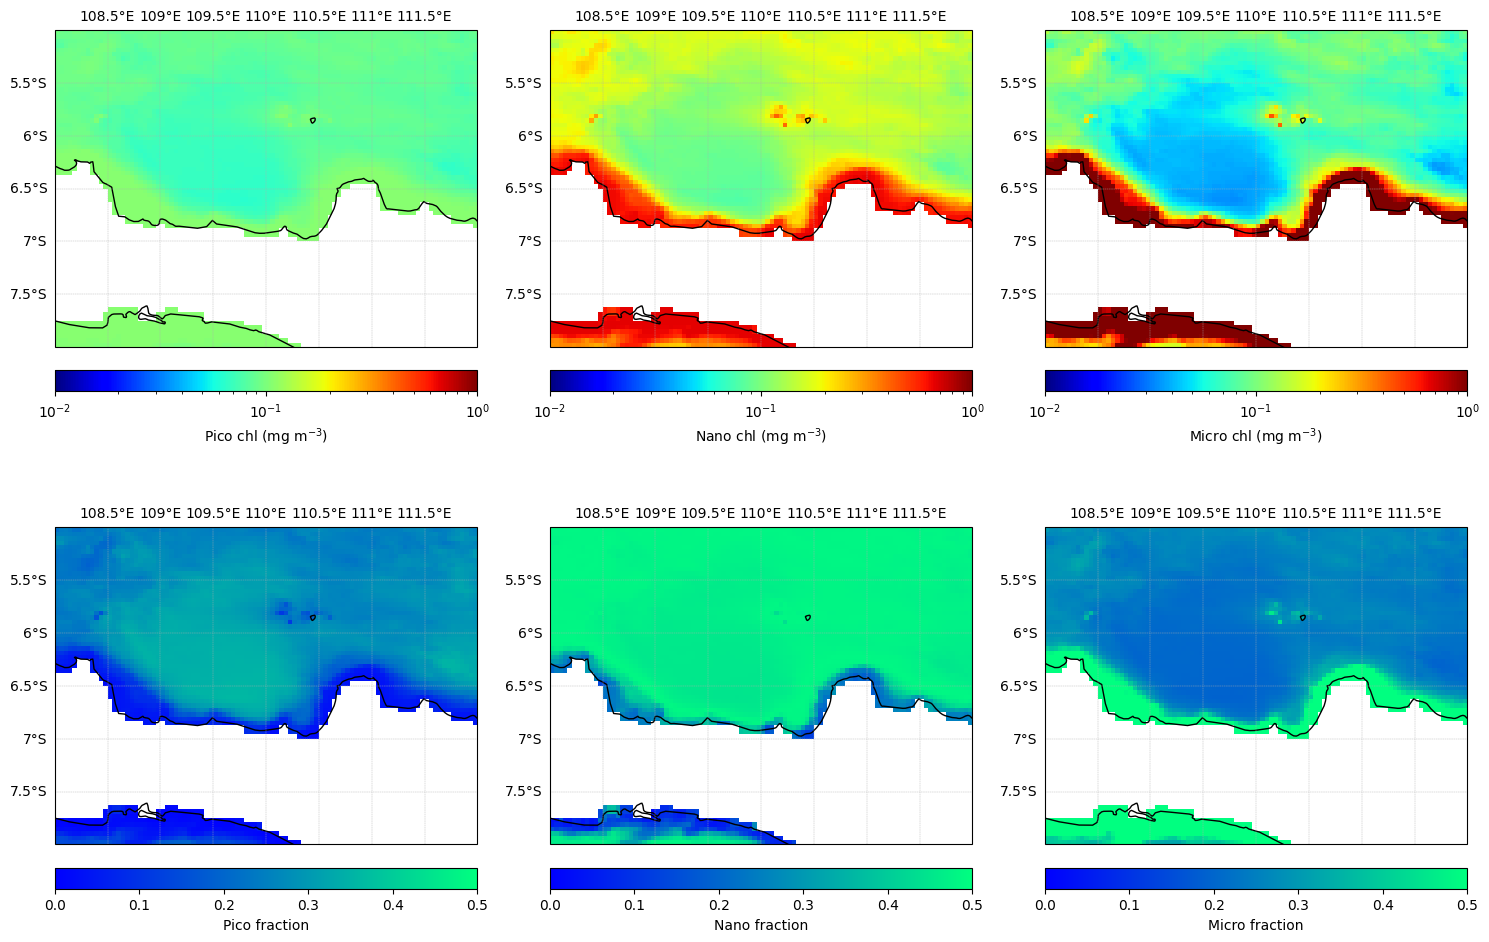

In [13]:
import matplotlib.colors as mcolors

lat_min, lat_max = -8, -5
lon_min, lon_max = 108, 112

psc_sub = psc.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))
CHL_sub = CHL.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

# Compute fractions from the subset
psc_frac_sub = xr.Dataset({"chl_pico_frac": psc_sub["chl_pico"] / CHL_sub,
        "chl_nano_frac": psc_sub["chl_nano"] / CHL_sub,
        "chl_micro_frac": psc_sub["chl_micro"] / CHL_sub})

# Variables for plotting
abs_vars = ["chl_pico", "chl_nano", "chl_micro"]
frac_vars = ["chl_pico_frac", "chl_nano_frac", "chl_micro_frac"]
titles = ["Pico", "Nano", "Micro"]

fig, axs = plt.subplots(2, 3, figsize=(15, 10),subplot_kw={"projection": ccrs.PlateCarree()})

# Plot size-partitioned chlorophyll (top row)
for ax, var, title in zip(axs[0], abs_vars, titles):
    da = psc_sub[var]
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(f"{title} chlorophyll")
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    # Add lat/lon gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, linestyle="--")
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    img = da.plot(ax=ax, x="lon", y="lat", cmap="jet", robust=True, add_colorbar=False, norm=mcolors.LogNorm(vmin=0.01, vmax=1))
    cbar = plt.colorbar(img, ax=ax, orientation="horizontal", pad=0.05)
    cbar.set_label(f"{title} chl (mg m$^{{-3}}$)")

# Plot fractions (bottom row)
for ax, var, title in zip(axs[1], frac_vars, titles):
    da = psc_frac_sub[var]
    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(f"{title} fraction")
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    # Add lat/lon gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.3, linestyle="--")
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    img = da.plot(ax=ax, x="lon", y="lat", cmap="winter", add_colorbar=False, vmin=0, vmax=0.5)
    cbar = plt.colorbar(img, ax=ax, orientation="horizontal", pad=0.05)
    cbar.set_label(f"{title} fraction")

plt.tight_layout()
plt.show()

This 2×3 plot of absolute chlorophyll (top row) and fractional size-class contributions (bottom row) provides a visual summary, showing both how much chlorophyll is present and how it is partitioned among pico-, nano-, and micro-phytoplankton. This combination of absolute and relative information can help you interpret ecological structure and potential trophic pathways in your region of interest.

## Visualizing multiple dimensions

A central theme of working with PACE data revolves around wrangling multiple dimensions of data into something you can conceptualize. Viewing three separate maps makes it a bit difficult to see the interactions between the different phytoplankton classes. This is important: we want to know where these boundaries are colliding, because this indicates that something is changing with the underlying oceanography.

Let’s try something a little different. Instead of making three separate plots for pico-, nano-, and micro-phytoplankton, we can combine them into a single “false true-color” image. Each pixel’s color will be defined by an RGB triplet where the red, green, and blue channels correspond to micro-, nano-, and pico-phytoplankton fractions, respectively. Because the fractions at each pixel already sum to 1, the resulting color directly encodes the relative contributions of each size class. This approach provides an immediate, visual sense of which size class dominates in each region, while still showing mixed contributions where colors blend.

> Fun fact: This RGB-stacking approach can be applied to *any* three datasets, including the three MOANA phytoplankton types. However, to make it work, the each dataset should first be scaled independently between 0 and 1 based on the min/max of each respective variable. This just puts everything in relative space so you can inter-compare values with varying ranges of values.

In [14]:
# Stack into RGB: R=Micro, G=Pico, B=Nano (or whatever mapping you prefer)
R = psc_frac_sub["chl_micro_frac"].values
G = psc_frac_sub["chl_nano_frac"].values
B = psc_frac_sub["chl_pico_frac"].values

rgb_image = np.stack([R, G, B], axis=-1)

Text(0.5, 1.0, 'Phytoplankton Size-Class RGB')

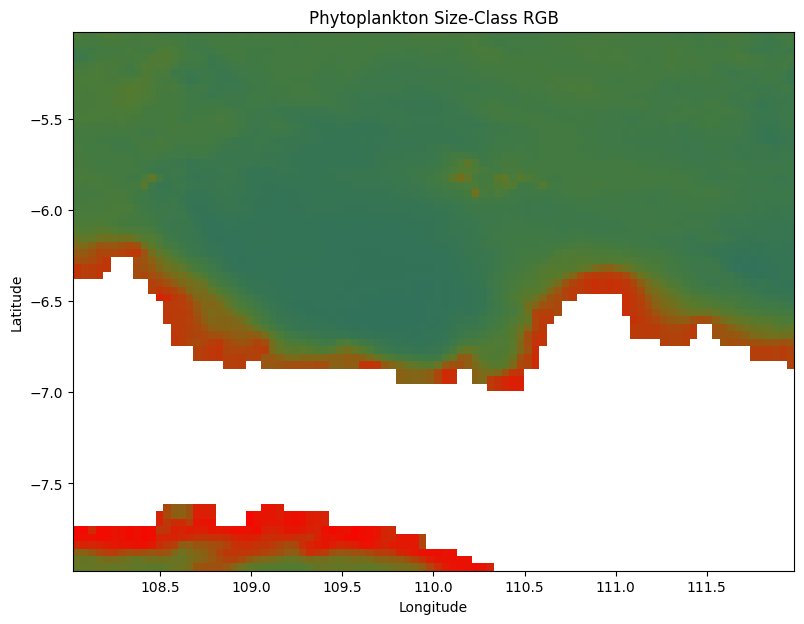

In [15]:
plt.figure(figsize=(10,7))
plt.imshow(rgb_image, extent=[
    psc_sub.lon.min(), psc_sub.lon.max(),
    psc_sub.lat.min(), psc_sub.lat.max()
])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Phytoplankton Size-Class RGB")
#plt.show()

## Adding some context

If you really want to get fancy, you can make a little legend that helps interpret the above color-scale into absolute fractional proportions of phytoplankton size classes. Useful context should you decide to include a plot like this in a manuscript.

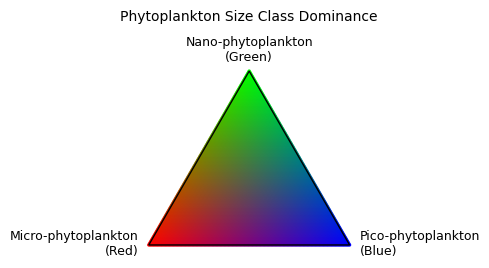

In [ ]:
from matplotlib.patches import Polygon

# Triangle vertices (x, y)
triangle = np.array([
    [0.5, np.sqrt(3)/2],  # top = Nano- (G)
    [0, 0],               # bottom left = Micro- (R)
    [1, 0]                # bottom right = Pico- (B)
])

# Create a grid in barycentric space
res = 150
xs, ys = [], []
rgbs = []

for i in range(res + 1):
    for j in range(res + 1 - i):
        k = res - i - j
        # barycentric fractions
        f = np.array([i, j, k]) / res
        # corresponding RGB: R=Micro, G=Nano, B=Pico
        rgb = f[[1, 0, 2]]
        # triangle xy
        xy = f[0] * triangle[0] + f[1] * triangle[1] + f[2] * triangle[2]
        xs.append(xy[0])
        ys.append(xy[1])
        rgbs.append(rgb)

xs = np.array(xs)
ys = np.array(ys)
rgbs = np.array(rgbs)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(xs, ys, c=rgbs, s=2)
ax.add_patch(Polygon(triangle, closed=True, edgecolor='black', fill=False))
ax.text(0.5, np.sqrt(3)/2 + 0.05, "Nano-phytoplankton\n(Green)", ha='center', fontsize=9)
ax.text(-0.05, -0.05, "Micro-phytoplankton\n(Red)", ha='right', fontsize=9)
ax.text(1.05, -0.05, "Pico-phytoplankton\n(Blue)", ha='left', fontsize=9)
ax.set_aspect('equal')
ax.axis('off')
plt.title("Phytoplankton Size Class Dominance", fontsize=10, pad=30)
plt.tight_layout()
plt.show()

## Summary

There you have it! MOANA is PACE's first functional-type phytoplankton algorithm, returning near-surface concentrations of Prochlorococcus, Synechococcus, and picoeukaryotes. Even if these specific critters aren’t your main focus, they are excellent indicators of underlying oceanographic conditions, since MOANA incorporates environmental drivers such as sea surface temperature. For highly migratory species or studies of trophic boundaries, these functional distributions can highlight regions of ecological importance.

In addition to functional types, we’ve explored estimating phytoplankton size classes (pico-, nano-, and micro-) from standard chlorophyll-a products. Size classes provide a complementary perspective: they help quantify how much biomass is allocated to different trophic pathways. Using global coefficients from Brewin et al., we generated first-order estimates of size-class chlorophyll and their fractional contributions. While this approach is approximate and can be improved with regional tuning or additional environmental data (e.g., SST), it serves as a useful exercise in combining satellite data with ecological interpretation. Together, functional-type products like MOANA and size-class partitioning offer complementary ways to understand phytoplankton distributions, productivity, and potential ecosystem impacts.